# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Medir la matriz de Mueller de un elemento

**Autor**: Jesús del Hoyo

**Fecha**:   02/10/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 4 LPNIRE100-B (P2), solo en Experimento 2.

We assume that the polarizers may depolarize, with their Mueller matrix as:

\begin{equation}
M_{pol}(\theta=0)=M_{depol}*M_{diat}(\theta=0)=
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & d & 0 & 0 \\
0 & 0 & d & 0 \\
0 & 0 & 0 & d \\
\end{array}\right] *
\left[\begin{array}{cccc}
P^2_1+P^2_2 & P^2_1-P^2 & 0 & 0 \\
P^2_1-P^2 & P^2_1+P^2_2 & 0 & 0 \\
0 & 0 & 2P_1P_2 & 0 \\
0 & 0 & 0 & 2P_1P_2 \\
\end{array}\right]
\end{equation}

**4th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).

**5th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, R1 and R2 rotation, both polarizers horizontal.
1. 2D, R1 and R2 rotation, first polarizer horizontal, second polarizer vertical.

Parameters that can be extracted from fit:
1. Theta 0 of R2.
1. Fine tuning of R parameters (moddeled as diattenuator retarder).


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt, floor
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize, exp
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D
#from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
#                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light
from polarimeter.utils import dibujar_2d_fitting, clean_intensity, plot_2d


import polarimeter.polarimeter as opsys
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import phyton_optics.polarization_mueller_analysis as amm
import numpy as np
import scipy as sp
import os

## Load data

In [3]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

intensity_0 = np.array([-0.0243, 0.0217])
# Load file, Illumination maximum
filename = 'Intensidad_max_2018-10-01.npz'
data = np.load(filename)
# Rename variables
Iindividual = data['Iindividual']
Naverage = data['Naverage']
# Make stadistics
mean = np.mean(Iindividual, axis=0)


D:\codigo\polarimeter\notebooks\calibration


## Use experimental data

We have experimental data with the beam splitter between R1 and R2. We calibrated it before calibrating R1 and R2, so we have reference values to check. The two polarizers are still, so the errors will be larger.

** Elementos caracterizados **

In [42]:
# Already characterized elements
(p11,p12, delay1) = (0.962421338047, 0.0723017114037, 109.674226344*degrees)
(p21, p22) = (0.974429083571, 0.0933985896782)
th0p1 = (122.449494104 + 125.992)*degrees #
th0p2 = (104.736748578 + 135.633)*degrees # + 135.633
th0p1ad = 4.49058478366*degrees
parR1 = [1.00633931598, 1.01339903131, 84.6008729373*degrees]
th0r1 = 175.571888512*degrees
th0r1ad = 9.1554487636*degrees
parR2 = [0.932112996884, 0.936748373013, 81.6800679199*degrees]
th0r2 = 2.78054116251*degrees
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
Jp2 = ps.polarizer_linear(p21, p22)
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = ps.Mueller_Real_Retarder(parR2[0], parR2[1], parR2[2])
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [th0p1+th0p1ad, th0r1+th0r1ad, th0r2, th0p2]
Ifuente = np.matrix(np.array([[5.86922518], [0.56906085], [-0.25053408], [5.83619796]]))


In [122]:
def analyze_angles_distribution(angles, Nintervals, angle_min, angle_max=0, plotfig=False):
    """Function to analize how the angles are distributed."""    
    Nmeasures = angles.shape
    Nmeasures = Nmeasures[1]
    # Check which is the minumum and maximum angle in each case
    if np.size(angle_min) != 4 or np.size(angle_max) != 4:
        angle_min = np.zeros(4)
        angle_max = np.zeros(4)
        for ind in range(4):
            a = angles[ind,:]
            angle_min[ind] = a.min()
            amax = a.max() - a.min()
            if amax < pi:
                angle_max[ind] = pi
            else:
                angle_max[ind] = 2*pi
    angle_max -= angle_min
    # Make the big loop in angles
    counts = np.zeros(Nintervals)
    for ind in range(Nmeasures):
        where = np.floor((angles[:,ind] - angle_min) * Nintervals / angle_max) #Use dtype=int in the definitive function
        counts[int(where[0]),int(where[1]),int(where[2]),int(where[3])] += 1
    # Plot the figures
    extension = np.array([0, angle_max[1], 0, angle_max[2]])/degrees
    plt.figure(figsize=(4*Nintervals[0], 4*Nintervals[3])) 
    for ind0 in range(Nintervals[0]):
        for ind3 in range(Nintervals[3]):
            Nsubfig = ind0*Nintervals[0] + ind3 + 1
            plt.subplot(Nintervals[0],Nintervals[3],Nsubfig)
            Z = counts[ind0,:,:,ind3]
            IDimage = plt.imshow(Z,interpolation='nearest', aspect='auto',
                                 origin='lower',extent=extension)  
            plt.xlabel("$\phi_1$")
            plt.ylabel("$\phi_4$")
            title = "$\phi_1$ = {}, $\phi_4$ = {}".format(ind0,ind3)
            plt.title(title)
            plt.axis(extension)
            plt.axis('scaled')
            plt.colorbar()
            IDimage.set_cmap("magma")
    # Output
    return counts

** Polarizador LPNIRE100B 0º (relativo) **

Angles random distribution parameter is: 0.922272160211;
Target
[[ 0.46574118 -0.02287583 -0.45994512  0.        ]
 [-0.02287583 -0.02222015  0.02426925  0.06544161]
 [-0.45994512  0.02426925  0.46453413 -0.0032548 ]
 [ 0.         -0.06544161  0.0032548  -0.0234272 ]]
Calculated
[[ 0.5065746  -0.02857756 -0.41067806  0.02089654]
 [ 0.00202801 -0.0383347  -0.05894878 -0.04020196]
 [-0.48569248 -0.00420809  0.45272388 -0.03925626]
 [ 0.00078157  0.01515437  0.00758469 -0.007091  ]]
Filtered
[[ 0.51702134 -0.0207917  -0.41804129  0.        ]
 [ 0.00604276 -0.03150457 -0.05372536  0.        ]
 [-0.47666974  0.00352854  0.44370211  0.        ]
 [ 0.          0.         -0.         -0.0132731 ]]
Error: 0.0453262318592; Error tras filtrar: 0.036418614853;
 
Parameters of the matrix:
  The matrix is physically consistent.
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.867414232999
    - The ddepolarization degree is: 0.497586724492
  The matrix might be singular.
 

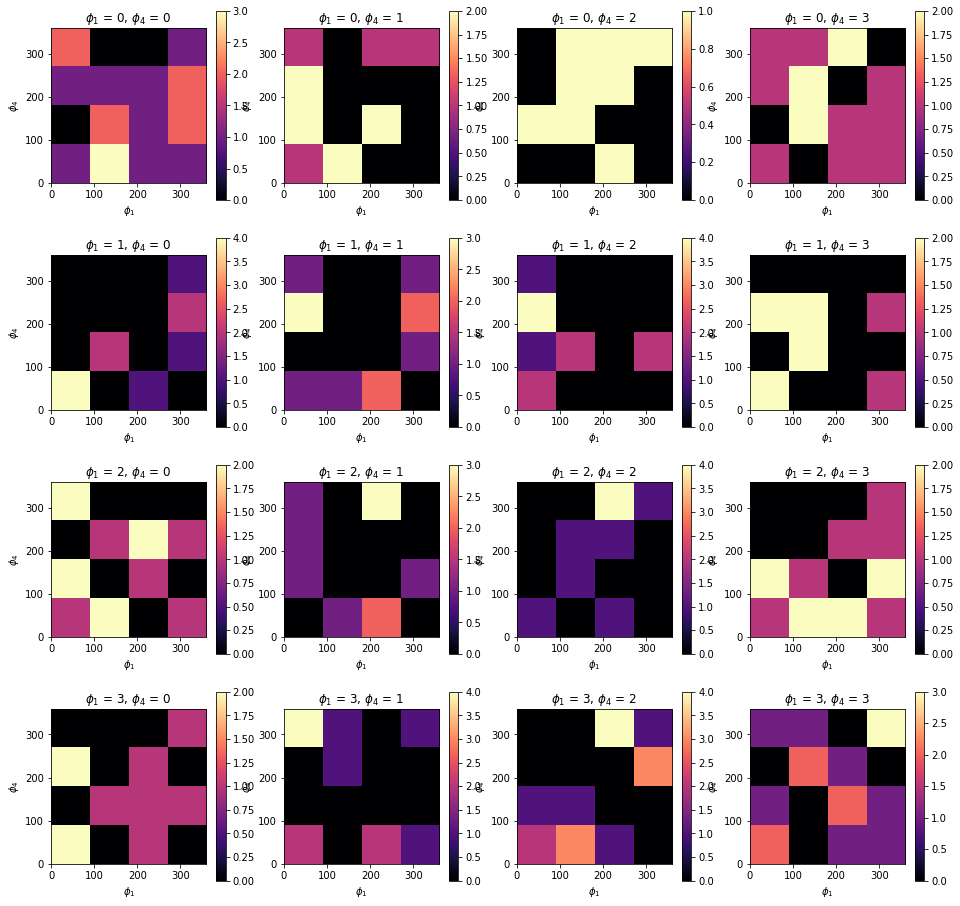

In [125]:
# Load experiment data
filename = 'Polarizador_LPNIRE100B_0deg_todos_2018-10-01.npz'
data = np.load(filename)
# np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)
angulos = data['angulos']*degrees
todos = data['todos']
Intensity = data['intensidad']
Intensity = clean_intensity(Intensity, mean[1], Nd=1)
Nintervals = [4, 4, 4, 4]
a2 = angulos[:,1] - th0[1]
a3 = angulos[:,2] - th0[2]
if todos:
    a1 = angulos[:,0] - th0[0]
    a4 = angulos[:,3] - th0[3]
else:
    ceros = np.zeros_like(angulos)
    a1 = ceros[:,0] - th0[0]
    a4 = ceros[:,3] - th0[3]
th1 = np.array([a1, a2, a3, a4])
# Analyze angles distribution
angle_min = -np.array(th0)
angle_max = np.array([2*pi, 2*pi, 2*pi, 2*pi]) + angle_min
cuentas = analyze_angles_distribution(th1, Nintervals, angle_min, angle_max, plotfig=True)
distribution = np.std(cuentas)
print('Angles random distribution parameter is: {};'.format(distribution))

# Do the polarimeter experiment
Mcalculated = opsys.polarimeter_experiment(M, Ifuente, Intensity, th1)

# Calculate target and error
Mtarget = Jp1 # Al menos parecido
Mtarget = ps.rotate_mueller(Mtarget, 133.576341506*degrees)
error = Mcalculated - Mtarget
error = np.std(error)

# Filter and calculate again
Mfiltered = amm.filter_reality_conditions(Mcalculated, tol=0.0133)
error2 = Mfiltered - Mtarget
error2 = np.std(error2)

# Print result and compare with the theoretical one
print('Target')
print(Mtarget)
print('Calculated')
print(Mcalculated)
print('Filtered')
print(Mfiltered)
print('Error: {}; Error tras filtrar: {};'.format(error, error2))

# Try to extract meaning from the matrix
amm.all_parameters(Mfiltered)
_, _, _ = amm.decompose_polar(Mfiltered, decomposition='DRP', verbose=True, co=False, tol=0.00133)
_, _ = amm.decompose_pure(Mfiltered, right=True, verbose=True, co=False, tol=0.00133)
#amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


** Polarizador LPNIRE100B 30º (relativo) **

Angles random distribution parameter is: 0.84259179767;
Target
[[ 0.46574118  0.38688624 -0.24978361  0.        ]
 [ 0.38688624  0.32182777 -0.22290541  0.03553955]
 [-0.24978361 -0.22290541  0.12048621  0.05504669]
 [ 0.         -0.03553955 -0.05504669 -0.0234272 ]]
Calculated
[[ 0.50048158  0.27789442 -0.12144878  0.00988989]
 [ 0.44137407  0.24962401 -0.07663463  0.00984805]
 [-0.23853404 -0.14231339  0.0444953  -0.0539778 ]
 [-0.01738261  0.01215147 -0.00589068 -0.03671034]]
Filtered
[[ 0.50158771  0.28339188 -0.1047262   0.        ]
 [ 0.43971383  0.24460147 -0.09200726  0.        ]
 [-0.23714911 -0.14092285  0.0510037   0.        ]
 [ 0.          0.          0.         -0.03578769]]
Error: 0.074212914422; Error tras filtrar: 0.0693526741329;
 
Parameters of the matrix:
  The matrix is physically consistent.
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.757334645373
    - The ddepolarization degree is: 0.653026978706
  The matrix is singular.
  The me

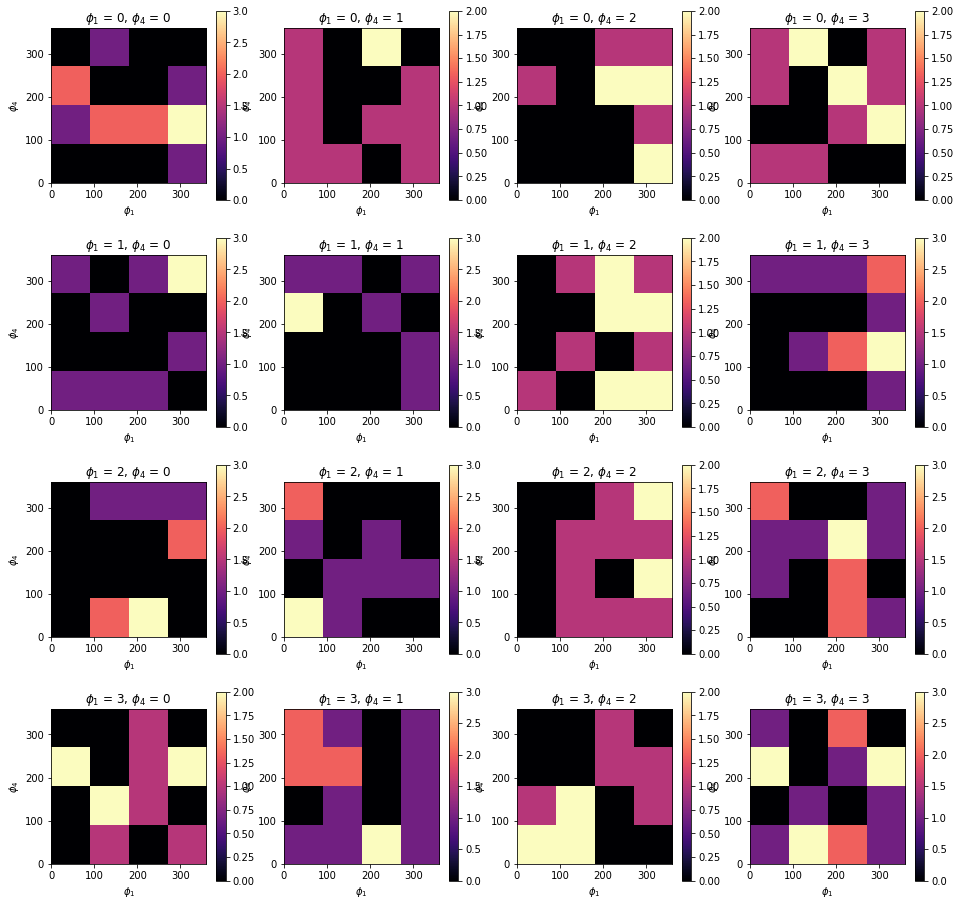

In [127]:
# Load experiment data
filename = 'Polarizador_LPNIRE100B_30deg_todos_2018-10-01.npz'
data = np.load(filename)
# np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)
angulos = data['angulos']*degrees
todos = data['todos']
Intensity = data['intensidad']
Intensity = clean_intensity(Intensity, mean[1], Nd=1)
a2 = angulos[:,1] - th0[1]
a3 = angulos[:,2] - th0[2]
if todos:
    a1 = angulos[:,0] - th0[0]
    a4 = angulos[:,3] - th0[3]
else:
    ceros = np.zeros_like(angulos)
    a1 = ceros[:,0] - th0[0]
    a4 = ceros[:,3] - th0[3]
th1 = np.array([a1, a2, a3, a4])
# Analyze angles distribution
angle_min = -np.array(th0)
angle_max = np.array([2*pi, 2*pi, 2*pi, 2*pi]) + angle_min
cuentas = analyze_angles_distribution(th1, Nintervals, angle_min, angle_max, plotfig=True)
distribution = np.std(cuentas)
print('Angles random distribution parameter is: {};'.format(distribution))

# Do the polarimeter experiment
Mcalculated = opsys.polarimeter_experiment(M, Ifuente, Intensity, th1)

# Calculate target and error
Mtarget = Jp1 # Al menos parecido
Mtarget = ps.rotate_mueller(Mtarget, 163.576341506*degrees)
error = Mcalculated - Mtarget
error = np.std(error)

# Filter and calculate again
Mfiltered = amm.filter_reality_conditions(Mcalculated, tol=0.0132)
error2 = Mfiltered - Mtarget
error2 = np.std(error2)

# Print result and compare with the theoretical one
print('Target')
print(Mtarget)
print('Calculated')
print(Mcalculated)
print('Filtered')
print(Mfiltered)
print('Error: {}; Error tras filtrar: {};'.format(error, error2))

# Try to extract meaning from the matrix
amm.all_parameters(Mfiltered)
_, _, _ = amm.decompose_polar(Mfiltered, decomposition='DRP', verbose=True, co=False, tol=0.00132)
_, _ = amm.decompose_pure(Mfiltered, right=True, verbose=True, co=False, tol=0.00133)
#amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


** Retardador WQ10E-850-SP 0º (relativo) **

Angles random distribution parameter is: 0.887742044459;
Target
[[ 0.87316608  0.00430034  0.00051809  0.        ]
 [ 0.00430034  0.86248137  0.08868704  0.10334034]
 [ 0.00051809  0.08868704  0.13703066 -0.8577632 ]
 [ 0.         -0.10334034  0.8577632   0.12634595]]
Calculated
[[ 0.84776816 -0.14491785  0.00940805 -0.04566003]
 [-0.00456476  0.66150133  0.13628955  0.07193371]
 [ 0.08360203 -0.14150872  0.6151972  -0.38423025]
 [ 0.00730079 -0.07748785  0.24106813  0.61882059]]
Filtered
[[ 0.84776816 -0.14491785  0.00940805 -0.04566003]
 [-0.00456476  0.66150133  0.13628955  0.07193371]
 [ 0.08360203 -0.14150872  0.6151972  -0.38423025]
 [ 0.00730079 -0.07748785  0.24106813  0.61882059]]
Error: 0.295330669919; Error tras filtrar: 0.273768458515;
 
Parameters of the matrix:
  The matrix is physically consistent.
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.829830635559
    - The ddepolarization degree is: 0.558015336965
  The matrix is not singular.
    

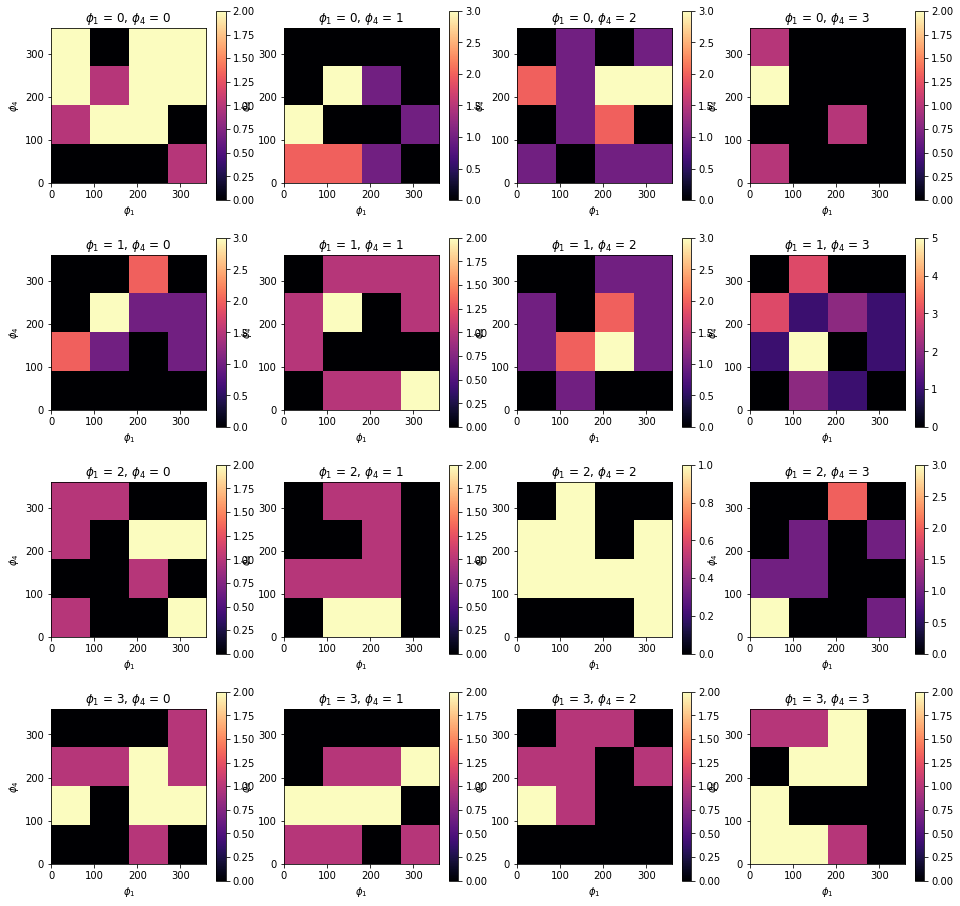

In [128]:
# Load experiment data
filename = 'Retardador_WQ10E-850-SP_0deg_todos_2018-10-01.npz'
data = np.load(filename)
# np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)
angulos = data['angulos']*degrees
todos = data['todos']
Intensity = data['intensidad']
Intensity = clean_intensity(Intensity, mean[1], Nd=1)
a2 = angulos[:,1] - th0[1]
a3 = angulos[:,2] - th0[2]
if todos:
    a1 = angulos[:,0] - th0[0]
    a4 = angulos[:,3] - th0[3]
else:
    ceros = np.zeros_like(angulos)
    a1 = ceros[:,0] - th0[0]
    a4 = ceros[:,3] - th0[3]
th1 = np.array([a1, a2, a3, a4])
# Analyze angles distribution
angle_min = -np.array(th0)
angle_max = np.array([2*pi, 2*pi, 2*pi, 2*pi]) + angle_min
cuentas = analyze_angles_distribution(th1, Nintervals, angle_min, angle_max, plotfig=True)
distribution = np.std(cuentas)
print('Angles random distribution parameter is: {};'.format(distribution))

# Do the polarimeter experiment
Mcalculated = opsys.polarimeter_experiment(M, Ifuente, Intensity, th1)

# Calculate target and error
Mtarget = Jr2 # Al menos parecido
Mtarget = ps.rotate_mueller(Mtarget, 93.4348437672*degrees)
error = Mcalculated - Mtarget
error = np.std(error)

# Filter and calculate again
Mfiltered = amm.filter_reality_conditions(Mcalculated, tol=0.0132)
error2 = Mfiltered - Mtarget
error2 = np.std(error2)

# Print result and compare with the theoretical one
print('Target')
print(Mtarget)
print('Calculated')
print(Mcalculated)
print('Filtered')
print(Mfiltered)
print('Error: {}; Error tras filtrar: {};'.format(error, error2))

# Try to extract meaning from the matrix
amm.all_parameters(Mfiltered)
_, _, _ = amm.decompose_polar(Mfiltered, decomposition='DRP', verbose=True, co=False, tol=0.00132)
_, _ = amm.decompose_pure(Mfiltered, right=True, verbose=True, co=False, tol=0.00133)
#amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


** Retardador 0º **

In [7]:
# Mueller matrices for polarizers
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
# Mueller matrices for retarders
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
parR1 = [1.0097711371, 1.01715770267, 84.1791246323*degrees]
parR2 = [0.992382266627, 0.989041217204, 82.6198373758*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
# All together
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [125.991665264*degrees, 154.418510636*degrees, 165.658968778*degrees, 135.63283835*degrees]
# IlluminationImax = 2.53466813 * 1.37
Pc = 0.35
parE = [1.38512099075/1.39758351467 * Imax, Imax, 90.3508816116*degrees, 104.96651768*degrees]
Ej = pj.elliptical_light(parE[0], parE[1], parE[2], parE[3])
Es = ps.Jones_to_Stokes(Ej, [1, Pc])
Es = np.array([[2.53481734], [0.02742128], [0.0021229 ], [2.53466813*Pc]]) *1.39**2
print(Es)
E0 = ps.circular_light()*Imax

# Load experiment data
filename = 'Retardador_WPQ10ME_405_0deg_todos_2018-09-21.npz'
data = np.load(filename)
# np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)
angulos = data['angulos']*degrees
todos = data['todos']
I = data['intensidad']
a2 = angulos[:,1] - th0[1]
a3 = angulos[:,2] - th0[2]
if todos:
    a1 = angulos[:,0] - th0[0]
    a4 = angulos[:,3] - th0[3]
else:
    ceros = np.zeros_like(angulos)
    a1 = ceros[:,0] - th0[0]
    a4 = ceros[:,3] - th0[3]
th1 = [a1, a2, a3, a4]

# Do the polarimeter experiment
Mbs = opsys.polarimeter_experiment(M, Es, I, th1)

# Calculate target and error
target = ps.polarizer_linear(0.942900250375, 0.41458023251)
target = ps.rotate_mueller(target, 0*degrees)
error = Mbs - target
error = np.mean(abs(error))
errorNorm = Mbs/Mbs[0,0] - target/target[0,0]
errorNorm = np.mean(abs(errorNorm))
#cH, fH = ps.is_homogeneous(Mbs)
#fis = ps.check_mueller(Mbs)
#cF = all([fis['cond1'][1], fis['cond2'][1], fis['cond3'][1], fis['cond5'][1]])
#fF = [fis['cond1'][0], fis['cond2'][0], fis['cond3'][0], fis['cond5'][0]]

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mbs)
print('Error: {}'.format(error))
print('Error normalizado: {}'.format(errorNorm))
#print('The calculated matrix is homogeneous: {}, with a degree of homogeneity {}.'.format(cH, fH))
#print('The calculated matrix is physically acceptable: {}, with condition factors {}'.format(cF, fF))

# Try to extract meaning from the matrix
amm.all_parameters(Mbs)
_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)
amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


[[4.89752058]
 [0.05298066]
 [0.00410166]
 [1.7140313 ]]
Target
[[0.53046883 0.35859206 0.         0.        ]
 [0.35859206 0.53046883 0.         0.        ]
 [0.         0.         0.39090781 0.        ]
 [0.         0.         0.         0.39090781]]
Calculated
[[ 1.03311076 -0.04971928 -0.05074748  0.02608649]
 [ 0.01239609  0.73098199  0.05985282 -0.60571284]
 [ 0.00960163 -0.04019021  1.08881294 -0.0555611 ]
 [-0.00350285  0.45352615  0.1215898   0.77733492]]
Error: 0.248022875416
Error normalizado: 0.212108100672
 
Parameters of the matrix:
  The matrix is not physically consistent:
    - Second condition violated (distance = -0.0557021801512)
    - Fifth condition violated (distance = -0.108793116582)
    - Sixth condition violated (distance = -0.0615229544025)
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.955893158383
    - The ddepolarization degree is: 0.293714605964
  The matrix is not singular.
    - The determinant of the matrix is = 0.9577158

** Retardador 30º **

In [8]:
# Mueller matrices for polarizers
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
# Mueller matrices for retarders
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
parR1 = [1.0097711371, 1.01715770267, 84.1791246323*degrees]
parR2 = [0.992382266627, 0.989041217204, 82.6198373758*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
# All together
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [125.991665264*degrees, 154.418510636*degrees, 165.658968778*degrees, 135.63283835*degrees]
# IlluminationImax = 2.53466813 * 1.37
Pc = 0.35
parE = [1.38512099075/1.39758351467 * Imax, Imax, 90.3508816116*degrees, 104.96651768*degrees]
Ej = pj.elliptical_light(parE[0], parE[1], parE[2], parE[3])
Es = ps.Jones_to_Stokes(Ej, [1, Pc])
Es = np.array([[2.53481734], [0.02742128], [0.0021229 ], [2.53466813*Pc]]) *1.39**2
print(Es)
E0 = ps.circular_light()*Imax

# Load experiment data
filename = 'Retardador_WPQ10ME_405_30deg_todos_2018-09-21.npz'
data = np.load(filename)
# np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)
angulos = data['angulos']*degrees
todos = data['todos']
I = data['intensidad']
a2 = angulos[:,1] - th0[1]
a3 = angulos[:,2] - th0[2]
if todos:
    a1 = angulos[:,0] - th0[0]
    a4 = angulos[:,3] - th0[3]
else:
    ceros = np.zeros_like(angulos)
    a1 = ceros[:,0] - th0[0]
    a4 = ceros[:,3] - th0[3]
th1 = [a1, a2, a3, a4]

# Do the polarimeter experiment
Mbs = opsys.polarimeter_experiment(M, Es, I, th1)

# Calculate target and error
target = ps.polarizer_linear(0.942900250375, 0.41458023251)
target = ps.rotate_mueller(target, 0*degrees)
error = Mbs - target
error = np.mean(abs(error))
errorNorm = Mbs/Mbs[0,0] - target/target[0,0]
errorNorm = np.mean(abs(errorNorm))
#cH, fH = ps.is_homogeneous(Mbs)
#fis = ps.check_mueller(Mbs)
#cF = all([fis['cond1'][1], fis['cond2'][1], fis['cond3'][1], fis['cond5'][1]])
#fF = [fis['cond1'][0], fis['cond2'][0], fis['cond3'][0], fis['cond5'][0]]

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mbs)
print('Error: {}'.format(error))
print('Error normalizado: {}'.format(errorNorm))
#print('The calculated matrix is homogeneous: {}, with a degree of homogeneity {}.'.format(cH, fH))
#print('The calculated matrix is physically acceptable: {}, with condition factors {}'.format(cF, fF))

# Try to extract meaning from the matrix
amm.all_parameters(Mbs)
_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)
amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


[[4.89752058]
 [0.05298066]
 [0.00410166]
 [1.7140313 ]]
Target
[[0.53046883 0.35859206 0.         0.        ]
 [0.35859206 0.53046883 0.         0.        ]
 [0.         0.         0.39090781 0.        ]
 [0.         0.         0.         0.39090781]]
Calculated
[[ 1.03473353 -0.02355881  0.00095117 -0.02739646]
 [-0.02050615  1.06588905 -0.00505842 -0.20975599]
 [-0.00939645 -0.16847247  0.72202827 -0.47472385]
 [-0.00204774  0.20753806  0.52156647  0.73726054]]
Error: 0.256582142727
Error normalizado: 0.191280559633
 
Parameters of the matrix:
  The matrix is not physically consistent:
    - Second condition violated (distance = -0.031155526874)
    - Fifth condition violated (distance = -0.070878907127)
    - Sixth condition violated (distance = -0.0288886659883)
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.936274560384
    - The ddepolarization degree is: 0.351269052975
  The matrix is not singular.
    - The determinant of the matrix is = 0.91152795

** Despolarizador 0º **

In [9]:
# Mueller matrices for polarizers
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
# Mueller matrices for retarders
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
parR1 = [1.0097711371, 1.01715770267, 84.1791246323*degrees]
parR2 = [0.992382266627, 0.989041217204, 82.6198373758*degrees]
Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])
Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])
# All together
M = [Jp1, Jr1, Jr2, Jp2]
th0 = [125.991665264*degrees, 154.418510636*degrees, 165.658968778*degrees, 135.63283835*degrees]
# IlluminationImax = 2.53466813 * 1.37
Pc = 0.35
parE = [1.38512099075/1.39758351467 * Imax, Imax, 90.3508816116*degrees, 104.96651768*degrees]
Ej = pj.elliptical_light(parE[0], parE[1], parE[2], parE[3])
Es = ps.Jones_to_Stokes(Ej, [1, Pc])
Es = np.array([[2.53481734], [0.02742128], [0.0021229 ], [2.53466813*Pc]]) *1.39**2
print(Es)
E0 = ps.circular_light()*Imax

# Load experiment data
filename = 'Difusor_DG10_600B_todos_2018-09-21.npz'
data = np.load(filename)
# np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)
angulos = data['angulos']*degrees
todos = data['todos']
I = data['intensidad']
a2 = angulos[:,1] - th0[1]
a3 = angulos[:,2] - th0[2]
if todos:
    a1 = angulos[:,0] - th0[0]
    a4 = angulos[:,3] - th0[3]
else:
    ceros = np.zeros_like(angulos)
    a1 = ceros[:,0] - th0[0]
    a4 = ceros[:,3] - th0[3]
th1 = [a1, a2, a3, a4]

# Do the polarimeter experiment
Mbs = opsys.polarimeter_experiment(M, Es, I, th1)

# Calculate target and error
target = ps.polarizer_linear(0.942900250375, 0.41458023251)
target = ps.rotate_mueller(target, 0*degrees)
error = Mbs - target
error = np.mean(abs(error))
errorNorm = Mbs/Mbs[0,0] - target/target[0,0]
errorNorm = np.mean(abs(errorNorm))
#cH, fH = ps.is_homogeneous(Mbs)
#fis = ps.check_mueller(Mbs)
#cF = all([fis['cond1'][1], fis['cond2'][1], fis['cond3'][1], fis['cond5'][1]])
#fF = [fis['cond1'][0], fis['cond2'][0], fis['cond3'][0], fis['cond5'][0]]

# Print result and compare with the theoretical one
print('Target')
print(target)
print('Calculated')
print(Mbs)
print('Error: {}'.format(error))
print('Error normalizado: {}'.format(errorNorm))
#print('The calculated matrix is homogeneous: {}, with a degree of homogeneity {}.'.format(cH, fH))
#print('The calculated matrix is physically acceptable: {}, with condition factors {}'.format(cF, fF))

# Try to extract meaning from the matrix
amm.all_parameters(Mbs)
_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)
amm.all_parameters(target)
#_, _, _ = amm.decompose_polar(Mbs, decomposition='DRP', verbose=True, co=False)


[[4.89752058]
 [0.05298066]
 [0.00410166]
 [1.7140313 ]]
Target
[[0.53046883 0.35859206 0.         0.        ]
 [0.35859206 0.53046883 0.         0.        ]
 [0.         0.         0.39090781 0.        ]
 [0.         0.         0.         0.39090781]]
Calculated
[[ 0.38346673  0.01033921  0.00219508  0.00649868]
 [ 0.00354153  0.3745328   0.01900631  0.00399694]
 [-0.0131321  -0.02288899  0.34635711  0.0105266 ]
 [ 0.00240395  0.01059175 -0.03584967  0.36200127]]
Error: 0.0754242991955
Error normalizado: 0.127745870547
 
Parameters of the matrix:
  The matrix is physically consistent.
  The matrix is depolarizing:
    - The degree of polarimetric purity is: 0.945105301071
    - The ddepolarization degree is: 0.326765925225
  The matrix is not singular.
    - The determinant of the matrix is = 0.0181159967587
    - The minimum eigenvalue of the matrix is = 0.354488176001
  The mean intensity coefficient (m00) is: 0.383466733665
  The diattenuation is: 0.0323565914863
    - The linear d

In [35]:
M = ps.general_diattenuator_param(0.9, 0.1, pi/8, pi/4, True)
print(M)
H = amm.covariance_matrix(M)
print(H)
M2 = amm.inverse_covariance(H)
print(M2)

[[0.41       0.28284271 0.2        0.2       ]
 [0.28284271 0.25       0.11313708 0.11313708]
 [0.2        0.11313708 0.17       0.08      ]
 [0.2        0.11313708 0.08       0.17      ]]
[[0.30642136+0.j         0.07828427+0.07828427j 0.07828427-0.07828427j
  0.085     +0.j        ]
 [0.07828427-0.07828427j 0.04      +0.j         0.        -0.04j
  0.02171573-0.02171573j]
 [0.07828427+0.07828427j 0.        +0.04j       0.04      +0.j
  0.02171573+0.02171573j]
 [0.085     +0.j         0.02171573+0.02171573j 0.02171573-0.02171573j
  0.02357864+0.j        ]]
[[0.41       0.28284271 0.2        0.2       ]
 [0.28284271 0.25       0.11313708 0.11313708]
 [0.2        0.11313708 0.17       0.08      ]
 [0.2        0.11313708 0.08       0.17      ]]


1

In [147]:
np.array([True, False, True]) * np.array([1, 2, 3])

array([1, 0, 3])

## Temporary functions

Stored here for testing

In [260]:
def generate_even_distribution(Nmeasures, limits, method='linear', N_total_motors=4):
    """Function that creates random values but evenly distributed among the four motors."""
    # Calculate the number of motors that we are going to move effectively
    moving_motors = np.array(limits) > 0
    aux = np.array(range(N_total_motors))
    moving_motors_indices = aux[moving_motors]
    first_moving_motor = min(moving_motors_indices)
    Nmotors = float(sum(moving_motors))
    # Calculate the number of different values in each motor, and the center values
    Nvalues = np.zeros(N_total_motors)
    centers = list(np.matrix(np.zeros(N_total_motors)).T)
    #centers = list(np.zeros(N_total_motors))
    Dinterval = np.zeros(N_total_motors)
    used_motors = 0
    Nmeasures_origin = int(Nmeasures)
    for ind in range(N_total_motors):
        if limits[ind] == 0:
            Nvalues[ind] = 0
        else:
            # Calculate the number of intervals
            Nvalues[ind] = np.floor(Nmeasures**(1/(Nmotors-used_motors)))
            Nmeasures /= Nvalues[ind]
            used_motors += 1
            # Calculate centers
            Dinterval[ind] = limits[ind] / Nvalues[ind]
            centers[ind] = (np.array(range(int(Nvalues[ind]))) + 0.5) * Dinterval[ind]
    # Make a big loop to start puting each value
    angles = np.zeros([N_total_motors,Nmeasures_origin])
    indiv_ind = np.zeros(N_total_motors, dtype=int)
    for ind in range(Nmeasures_origin):
        # Calculate the angles
        random_values = np.random.rand(N_total_motors) - 0.5
        aux = np.zeros(N_total_motors)
        for indA in range(N_total_motors):
            # Linear distribution inside each interval
            if method == 'linear' or 'Linear' or 'LINEAR':
                aux[indA] = centers[indA][indiv_ind[indA]] + Dinterval[indA]*random_values[indA]
            elif method == 'gaussian' or 'Gaussian' or 'GAUSSIAN':
                moved = np.sign(np.random.rand(1)-0.5) * Dinterval[indA] * sqrt(random_values[indA]**(-1))
                aux[indA] = centers[indA][indiv_ind[indA]] + moved
        angles[:,ind] = aux
        # Calculate the new individual indices
        indiv_ind[first_moving_motor] += 1
        indiv_ind = check_indices(indiv_ind, Nvalues)
    return angles

def check_indices(indices, Nvalues):
    """Function that checks that indices don't reach their limits."""
    # Find moving motors
    N_total_motors = len(Nvalues)
    moving_motors = np.array(Nvalues) > 1
    N_moving_motors = sum(moving_motors)
    aux = np.array(range(N_total_motors))
    moving_indices = aux[moving_motors]
    # Check the indices. If one reaches the maximum, add one to the following
    for counter, ind in enumerate(moving_indices):
        if indices[ind] == Nvalues[ind] and Nvalues[ind] != 0:
            indices[ind] = 0
            # TCheck that there is a following motor
            if counter < N_moving_motors-1:
                indices[moving_indices[counter+1]] += 1
    return indices

In [261]:
# Test
N = 200.
limits = [0, pi, pi, 0]
x = generate_even_distribution(N, limits, method='gaussian')
print(x)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [230]:
centers = list(np.matrix(np.zeros(4)).T)
print(centers[1])

[[0.]]


In [3]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

# Load file, Experiment 4
filename = 'Experimento_4_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e4x = data['angle2x']*degrees
angle_e4y = data['angle2y']*degrees
Imax_e4 = data['intensity_max']
I_e4 = data['intensity2']
Imax = data['intensity_max']

# Load file, Experiment 5a
filename = 'Experimento_5a_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5ax = data['angle2x']*degrees
angle_e5ay = data['angle2y']*degrees
Imax_e5a = data['intensity_max']
I_e5a = data['intensity2']
# Load file, Experiment 5b
filename = 'Experimento_5b_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5bx = data['angle2x']*degrees
angle_e5by = data['angle2y']*degrees
Imax_e5b = data['intensity_max']
I_e5b = data['intensity2']

D:\Codigo UCM\polarimeter\notebooks\calibration


IOError: [Errno 2] No such file or directory: 'Experimento_4_2018-08-23.npz'